## **<h3 align="center"> Deep Learning - Project </h3>**
# **<h3 align="center">Preprocessing</h3>**
**Group 4 members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Steven Carlson - 20240554@novaims.unl.pt - 20240554<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub - 20240505@novaims.unl.pt - 20240505<br>
Zofia Wojcik  - 20240654@novaims.unl.pt - 20240654<br>

# Table of Contents
* [1. Introduction](#intro)
* [2. Setup](#setup)
* [3. Data Loading and Exploration](#dataloadandexpl)
    * [3.1. Data Loading](#data_loading)
    * [3.2. Validating File Paths](#val_file_path)
    * [3.3. Checking for Missing or Duplicate Values](#NaN_and_duplicates)
    * [3.4. Visualization](#visualization)
* [4. General Image Preprocessing](#image_preproc)
    * [4.1. Visualization](#image_visualization)
    * [4.2. Image Duplicates](#image_duplicates)
    * [4.3. Channels](#image_channels)
    * [4.4. Text Recognition](#text_recognition)
    * [4.5. Human Recognition](#human_recognition)

* [5. Train Test Split](#train_test_split)


In [1]:
#we can also connect to drive and have the images there 

# 1. Introduction <a class="anchor" id="intro"></a>

This project focuses on developing a deep learning model to classify rare species based on images. The dataset comes from the Encyclopedia of Life (EOL) and is curated as part of the *BioCLIP: A Vision Foundation Model for the Tree of Life* study. The full study is available in our repository [here](<Project Description/BioCLIP_study.pdf>).  
In this notebook, we will focus on setting up the environment and preprocessing the data. This includes loading the dataset, exploring its structure, splitting it into training, validation, and test sets, and applying necessary image transformations. These steps are crucial for ensuring that the model is trained effectively and generalizes well to new data.  

# 2. Setup <a class="anchor" id="setup"></a>
In this section, we will import the necessary libraries that will be used throughout the notebook. These libraries will help with data handling and image processing.

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

2025-04-15 23:50:47.074423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744757447.189873    3544 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744757447.222405    3544 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744757447.486006    3544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744757447.486030    3544 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744757447.486032    3544 computation_placer.cc:177] computation placer alr

TensorFlow version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Standard libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns

# Libraries for image processing
from glob import glob
from PIL import Image
# pip install ImageHash
import imagehash

# Train test split
from sklearn.model_selection import train_test_split


# Tensorflow for GPU
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# 3. Data Loading & Exploration <a class="anchor" id="dataloadandexpl"></a>

## 3.1. Data Loading <a class="anchor" id="data_loading"></a>
In this section, we'll start by unzipping the dataset and loading the metadata CSV file. This allows us to explore the data and validate the image paths.

In [4]:
# Defining the paths
zip_path = "rare_species 1.zip"
extract_path = "rare_species"
csv_path = os.path.join(extract_path, "metadata.csv")  

# Extract the ZIP file 
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

Now that we already extract the zip file let's check the metadata as well as checking the path.

In [5]:
# Load metadata CSV
df = pd.read_csv(csv_path, index_col="rare_species_id")
print("Metadata Loaded:")
df.head()

Metadata Loaded:


,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
rare_species_id,,,,,,
75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11983 entries, 75fd91cb-2881-41cd-88e6-de451e8b60e2 to 54894a59-151f-4814-ac32-3a336841e58e
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   eol_content_id  11983 non-null  int64 
 1   eol_page_id     11983 non-null  int64 
 2   kingdom         11983 non-null  object
 3   phylum          11983 non-null  object
 4   family          11983 non-null  object
 5   file_path       11983 non-null  object
dtypes: int64(2), object(4)
memory usage: 655.3+ KB


## 3.2. Validating File Paths <a class="anchor" id="val_file_path"></a>
The file paths in the dataset follow a specific structure based on the metadata columns. We will check that the file paths match this expected format:

- The folder name in the path should be a combination of the phylum and family.
- The filename should consist of the eol_content_id and eol_page_id.

In [7]:
# Function to check if file_path matches expected format
def validate_file_paths(df):
    mismatches = []
    
    for idx, row in df.iterrows():
        # Extract expected components
        expected_folder = f"{row['phylum']}_{row['family']}"
        expected_filename = f"{row['eol_content_id']}_{row['eol_page_id']}"

        # Extract actual components from file_path
        actual_parts = row["file_path"].split("/")
        
        if len(actual_parts) != 2:  # Ensure it follows the expected structure
            mismatches.append((idx, "Invalid path structure"))
            continue
        
        actual_folder, actual_filename = actual_parts
        actual_filename = actual_filename.split("_eol-")[0]  # Remove trailing parts

        # Check for mismatches
        if actual_folder != expected_folder or actual_filename != expected_filename:
            mismatches.append((idx, actual_folder, expected_folder, actual_filename, expected_filename))

    # Convert results to DataFrame for easy review
    if mismatches:
        mismatch_df = pd.DataFrame(mismatches, columns=["Index", "Actual Folder", "Expected Folder", "Actual Filename", "Expected Filename"])
        print("⚠️ Mismatches Found:")
        display(mismatch_df)
    else:
        print("✅ All file paths match the expected format.")

# Run validation
validate_file_paths(df)


✅ All file paths match the expected format.


## 3.3. Checking for Missing or Duplicate Values <a class="anchor" id="NaN_and_duplicates"></a>

In this section, we will check for missing values and duplicates in the metadata.

In [8]:
df.describe(include="O")

,kingdom,phylum,family,file_path
count,11983,11983,11983,11983
unique,1,5,202,11983
top,animalia,chordata,dactyloidae,chordata_lemuridae/9465817_326525_eol-full-siz...
freq,11983,9952,300,1


In [9]:
# Check for duplicate values
print("\nNumber of duplicate rows:")
df.duplicated().sum()


Number of duplicate rows:


np.int64(0)


Missing Values: There are no missing values in the dataset.

Duplicates: There are no duplicate rows in the metadata. Each row is unique based on the rare_species_id index.

Value Distribution: By checking the frequency of the most common values in each column, we can observe how the categories are distributed.

Given that the data is clean (no missing values, no duplicates), we can now proceed to explore the distribution of our data visually to better understand the representation of species across different categories such as phylum and family.

## 3.4. Visualization <a class="anchor" id="visualization"></a>

Visualization is crucial in understanding  metadata. <br>

In [10]:
def plot_count_with_annotations(data, column, top_n=20, bottom_n=False, figsize=(6, 4)):
    '''
    Plot the distribution of classes in a specified column of a DataFrame, showing the top or bottom N classes.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data to plot.
    column (str): The column in the DataFrame for which the distribution will be plotted.
    top_n (int, optional): The number of top classes to display. Default is 20.
    bottom_n (bool, optional): Whether to show the bottom N classes instead of top N. Default is False.
    figsize (tuple, optional): The size of the figure (width, height). Default is (6, 4).
    
    Returns:
    None (displays the plot)
    '''
    # Get class counts
    class_counts = data[column].value_counts()
    
    # Get top N or bottom N classes
    if bottom_n:
        class_counts = class_counts.tail(top_n)  # bottom N
    else:
        class_counts = class_counts.head(top_n)  # top N
    
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=class_counts.index, y=class_counts.values)
    
    # Add annotations for each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',  # Format count without decimals
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', 
                        xytext=(0, 5), textcoords='offset points')
    
    plt.title(f'Top {top_n} {column} Classes' if not bottom_n else f'Bottom {top_n} {column} Classes')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

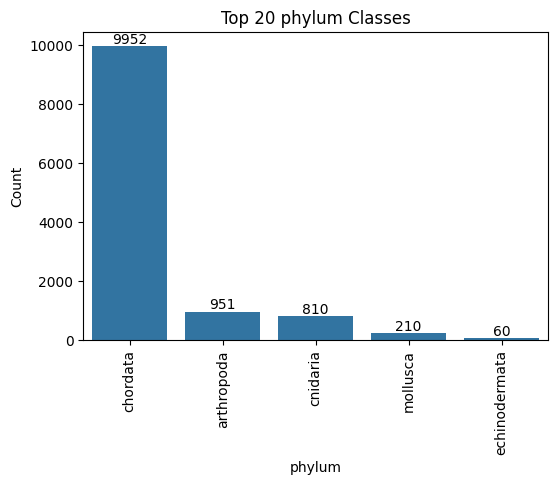

In [11]:
# Visualize the distribution of species across different phyla
plot_count_with_annotations(df, 'phylum', figsize=(6, 4))

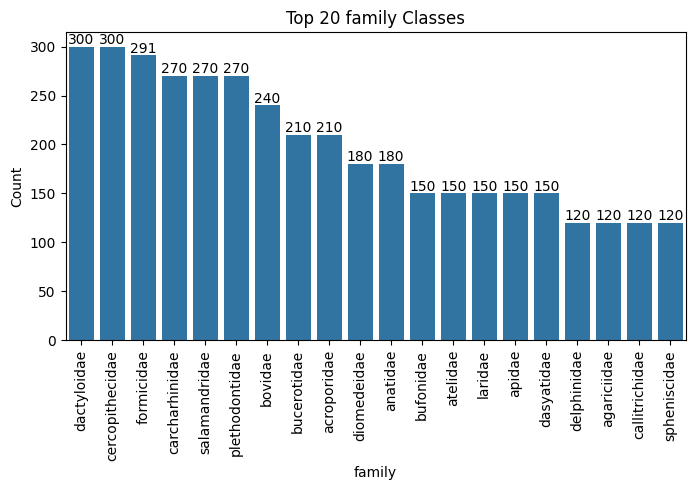

In [12]:
# Plot the top 20 families
plot_count_with_annotations(df, 'family', top_n=20, figsize=(8, 4))

In [ ]:
# Plot the bottom 20 families
plot_count_with_annotations(df, 'family', top_n=20, bottom_n=True, figsize=(8, 4))

We can also explore the distribution of family inside each phylum. 

In [ ]:
def print_unique_families_per_phylum(data, phylum_column='phylum', family_column='family'):
    '''
    Print the count of unique families per phylum.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    phylum_column (str, optional): The column for the phylum. Default is 'phylum'.
    family_column (str, optional): The column for the family. Default is 'family'.
    
    Returns:
    None (prints the counts)
    '''
    unique_families_per_phylum = data.groupby(phylum_column)[family_column].nunique()
    print("Unique Families per Phylum:")
    print(unique_families_per_phylum)

print_unique_families_per_phylum(df)

In [ ]:
def plot_family_distribution_by_phylum(data, phylum_column='phylum', family_column='family', 
                                       selected_phylum=None, top_n=20, figsize=(6, 4)):
    '''
    Plot the distribution of families within each phylum. 
    For a specific phylum (selected_phylum), show top N families, otherwise, show all families.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data to plot.
    phylum_column (str, optional): The column for the phylum. Default is 'phylum'.
    family_column (str, optional): The column for the family. Default is 'family'.
    selected_phylum (str, optional): The phylum for which to display top N families. Default is None (show all).
    top_n (int, optional): Number of top families to display for the selected phylum. Default is 20.
    figsize (tuple, optional): The size of the figure (width, height). Default is (12, 8).
    
    Returns:
    None (displays the plot)
    '''
    # Filter data for the selected phylum (if provided)
    if selected_phylum:
        selected_phylum_data = data[data[phylum_column] == selected_phylum]
        family_counts = selected_phylum_data[family_column].value_counts()

        # Get top N families for the selected phylum
        top_families = family_counts.head(top_n).index
        
        # Filter data for top N families of selected phylum
        filtered_data = selected_phylum_data[selected_phylum_data[family_column].isin(top_families)]
        
        # Plot top N families for selected phylum
        plt.figure(figsize=figsize)
        sns.countplot(data=filtered_data, x=family_column, order=top_families, color='skyblue')
        
        # Add count labels above each bar
        for p in plt.gca().patches:
            height = p.get_height()
            if height > 0:
                plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

        plt.title(f'Families in Phylum {selected_phylum}')
        plt.xlabel(family_column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    
    else:
        # For all phyla, plot distribution without filtering top N
        plt.figure(figsize=figsize)
        sns.countplot(data=data, x=family_column, hue=phylum_column, color='skyblue')

        # Add count labels above each bar
        for p in plt.gca().patches:
            height = p.get_height()
            if height > 0:
                plt.gca().annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')

        plt.title('Family Distribution Across All Phyla')
        plt.xlabel(family_column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

In [ ]:
plot_family_distribution_by_phylum(df, selected_phylum="arthropoda")

In [ ]:
plot_family_distribution_by_phylum(df, selected_phylum="chordata", top_n=10)

In [ ]:
plot_family_distribution_by_phylum(df, selected_phylum="cnidaria")

In [ ]:
plot_family_distribution_by_phylum(df, selected_phylum="echinodermata")

In [ ]:
plot_family_distribution_by_phylum(df, selected_phylum="mollusca")

# 4. General Image Preprocessing <a class="anchor" id="image_preproc"></a>
Before splitting the images by phylum, we will randomly check some samples and perform general preprocessing.
## 4.1. Visualization <a class="anchor" id="image_visualization"></a>


To start lets run a code that will random display 5 mages for each phylum.

In [ ]:
def show_sample_images_by_phylum(df, image_folder, num_samples=5, figsize=(15, 15)):
    '''
    Display sample images for each phylum in a grid. 5 random samples for each phylum.
    
    Parameters:
    df (DataFrame): The DataFrame containing the metadata and image paths.
    image_folder (str): The folder containing the image files.
    num_samples (int, optional): Number of images to display for each phylum. Default is 5.
    figsize (tuple, optional): The size of the figure. Default is (15, 15).
    
    Returns:
    None (displays the plot)
    '''
    # Group by phylum and sample `num_samples` images from each phylum
    phylum_groups = df.groupby('phylum')
    
    # Determine the number of rows and columns for the grid
    num_phyla = len(phylum_groups)
    rows = num_phyla
    cols = num_samples
    
    # Create a figure with a grid layout
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Iterate through each phylum and display images
    for i, (phylum, group) in enumerate(phylum_groups):
        # Sample images for the current phylum
        sample_df = group.sample(min(num_samples, len(group)))
        
        for j, (_, row) in enumerate(sample_df.iterrows()):
            img_path = os.path.join(image_folder, row['file_path'])
            ax = axes[i, j] if num_phyla > 1 else axes[j]
            
            if os.path.exists(img_path):
                image = Image.open(img_path)
                ax.imshow(image)
                ax.set_title(f'{row["phylum"]}')
            else:
                ax.set_title("Missing Image")
            ax.axis("off")
        
        # Set title for each phylum row
        axes[i, 0].set_ylabel(phylum, fontsize=12, rotation=0, labelpad=30)

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

show_sample_images_by_phylum(df, extract_path, num_samples=5)

We have images of varying sizes across different phyla and even within each phylum. Since we've decided to split the dataset by phylum, we will handle the rescaling accordingly for each phylum.

Additionally, there are some general preprocessing steps we can apply:

- Detect duplicate images: identify and remove any duplicate images from the dataset to ensure we don't have redundant data.

- Check RGB channels: verify the number of channels in each image, as some images may have only two channels instead of the standard three (RGB).

- Identify letters in images: implement code to detect any text (letters) present within the images.

- Identify human beings

## 4.2. Image Duplicates <a class="anchor" id="image_ duplicates"></a>

Image hashing is a technique that converts an image into a unique or near-unique value (hash) based on its visual content. This allows for quick comparison between images, even if they are slightly altered (e.g., resized or rotated). By using image hashing, we can efficiently identify duplicate or near-duplicate images in a dataset without comparing every pixel, making it a useful tool for cleaning up large image datasets and avoiding redundancy.


In [ ]:
# def find_duplicate_images(df, image_folder):
#     """
#     Identify duplicate images in the dataframe based on their hash values.
    
#     Parameters:
#     df (DataFrame): The DataFrame containing the metadata and image paths.
#     image_folder (str): The folder containing the image files.
    
#     Returns:
#     duplicates (DataFrame): DataFrame containing the duplicates.
#     """
#     # Dictionary to store image hashes
#     image_hashes = {}
#     duplicates = []

#     # Iterate through the dataframe and calculate hashes for each image
#     for _, row in df.iterrows():
#         img_path = os.path.join(image_folder, row['file_path'])
        
#         if os.path.exists(img_path):
#             # Open the image
#             img = Image.open(img_path)
            
#             # Calculate the hash of the image (you can use different algorithms)
#             img_hash = imagehash.phash(img)
            
#             # Check if the hash already exists
#             if img_hash in image_hashes:
#                 # If duplicate found, add to the duplicates list
#                 duplicates.append({
#                     'original_image': image_hashes[img_hash],
#                     'duplicate_image': img_path,
#                     'hash': img_hash
#                 })
#             else:
#                 # Store the hash with the image path
#                 image_hashes[img_hash] = img_path
    
#     # Convert duplicates list to DataFrame for better visualization
#     duplicates_df = pd.DataFrame(duplicates)
    
#     return duplicates_df

# duplicates_df = find_duplicate_images(df, extract_path)
# if not duplicates_df.empty:
#     print("Found duplicates:")
#     print(duplicates_df)
# else:
#     print("No duplicates found.")

In [ ]:
df

In [ ]:
# def find_duplicate_images(df, image_folder):
#     """
#     Find image duplicates in a dataset using perceptual hash (pHash).
#     Also includes the ID of the original image.

#     Parameters:
#     - df: DataFrame with at least 'file_path' and 'rare_species_id' as the index.
#     - image_folder: base folder where all images are stored.

#     Returns:
#     - duplicates_df: DataFrame with original, duplicate, hash, and original image ID.
#     """

#     # Temporarily reset the index so we can use 'rare_species_id' as a column
#     df_reset = df.reset_index()

#     image_hashes = {}  # hash -> original image path
#     id_lookup = dict(zip(df_reset['file_path'], df_reset['rare_species_id']))  # file_path -> ID
#     duplicates = []

#     for _, row in df_reset.iterrows():
#         file_path = row['file_path']
#         full_path = os.path.join(image_folder, file_path)

#         if os.path.exists(full_path):
#             try:
#                 img = Image.open(full_path)
#                 img_hash = imagehash.phash(img)

#                 if img_hash in image_hashes:
#                     original_path = image_hashes[img_hash]
#                     original_id = id_lookup.get(original_path)

#                     duplicates.append({
#                         "original_image": original_path,
#                         "original_image_id": original_id,
#                         "duplicate_image": file_path,
#                         "hash": str(img_hash)
#                     })
#                 else:
#                     image_hashes[img_hash] = file_path

#             except Exception as e:
#                 print(f"Couldn't process image {full_path}: {e}")

#     # Return to the original index structure after processing
#     return pd.DataFrame(duplicates)

# # Example usage:
# duplicates_df = find_duplicate_images(df, extract_path)

# if not duplicates_df.empty:
#     print("Found duplicates:")
#     display(duplicates_df)
# else:
#     print("No duplicates found!")

Let's store the DataFrame in our repository to avoid re-running the code every time, as it takes around 10 minutes to execute. This will make our workflow more efficient.

In [ ]:
# # Save the DataFrame to a CSV file in the repository
# duplicates_df.to_csv("duplicates.csv", index=False)

In [ ]:
# Load the DataFrame from the CSV file
duplicates_df = pd.read_csv("duplicates.csv")
duplicates_df.head(3)

We looked into the list of possible duplicate images that were flagged using perceptual hashing. To double-check, we opened them side by side and reviewed them manually.

In [ ]:
# for index, row in duplicates_df.iterrows():
#     original_image_path = os.path.join(extract_path, row['original_image'])
#     duplicate_image_path = os.path.join(extract_path, row['duplicate_image'])

#     # Extract phylum and family from the file path
#     phylum_family = os.path.dirname(row['original_image']).split(os.sep)[-1]

#     try:
#         # Open images
#         original_image = Image.open(original_image_path)
#         duplicate_image = Image.open(duplicate_image_path)
        
#         # Create side-by-side plot
#         fig, axes = plt.subplots(1, 2, figsize=(6, 3))
#         fig.suptitle(f"Phylum_Family: {phylum_family}", fontsize=8, fontweight="bold")

#         axes[0].imshow(original_image)
#         axes[0].axis("off")
#         axes[0].set_title("Original")

#         axes[1].imshow(duplicate_image)
#         axes[1].axis("off")
#         axes[1].set_title("Duplicate")

#         plt.show()
    
#     except Exception as e:
#         print(f"Error opening images: {e}")


Most were clearly duplicates and safe to remove — except for a few in the `arthropoda_apidae` group. These turned out to show different individuals or slightly different scenes, so we decided to keep them.

We're now removing all the real duplicates, but keeping the ones from `arthropoda_apidae` since they're not actually identical. This will help clean up the dataset without losing meaningful data.

In [ ]:
df.head(3)

In [ ]:
duplicates_df

In [ ]:
# Creating a copy of the original DataFrame to remove duplicates
df_no_duplicates = df.copy()

# Loop through the detected duplicates
for index, row in duplicates_df.iterrows():
    duplicate_path = row['duplicate_image']
    phylum_family = os.path.dirname(duplicate_path).split(os.sep)[-1]

    # Only drop the row if the duplicate is not from arthropoda_apidae
    if phylum_family != "arthropoda_apidae":
        df_no_duplicates = df_no_duplicates[df_no_duplicates['file_path'] != duplicate_path]
        print(f"Dropped row for: {duplicate_path}")
    else:
        print(f"Kept (not a real duplicate): {duplicate_path}")

In [ ]:
#Lets check that were deleted 161-2 images
#Print the shape of the DataFrame before and after removing duplicates
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)

In [ ]:
df.shape[0]-df_no_duplicates.shape[0]

In [ ]:
df_no_duplicates.info()

## 4.3. Channels <a class="anchor" id="image_ channels"></a>
Let's first check that they are all in the same 

In [ ]:
def check_image_channels(df, image_folder):
    """
    Check the number of channels for each image in the dataset.
    
    Parameters:
    df (DataFrame): The DataFrame containing image metadata.
    image_folder (str): The folder where the images are stored.
    
    Returns:
    None (prints out images with a different number of channels)
    """
    for _, row in df.iterrows():
        img_path = os.path.join(image_folder, row['file_path'])
        if os.path.exists(img_path):
            try:
                image = Image.open(img_path)
                mode = image.mode
                channels = len(mode)  # For 'RGB' it will return 3, for 'L' it will return 1 (grayscale)
                
                if channels != 3:  # If the number of channels is not 3 (RGB)
                    print(f"Image {img_path} has {channels} channels (mode: {mode})")
            except Exception as e:
                print(f"Error with image {img_path}: {e}")

check_image_channels(df_no_duplicates, "path_to_your_image_folder")

# 5. Train Val Test Split  <a class="anchor" id="train_test_split"></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

# Transformers for CLIP model and tokenizer
from transformers import CLIPProcessor, CLIPModel



from tqdm import tqdm  # progress bar


In [ ]:
train_df, temp_df = train_test_split(df_no_duplicates, test_size=0.3, random_state=42, stratify=df_no_duplicates['family'])
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['family'])

print(f"Train samples: {len(train_df)}, Val samples: {len(val_df)}, Test samples: {len(test_df)}")

# 6. BioClip Pre-Processing

## Transformers

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224))
])


## PyTorch Dataset

In [ ]:
import os
from PIL import Image
from torch.utils.data import Dataset

class RareSpeciesDataset(Dataset):
    def __init__(self, dataframe, transform, processor, root_dir, max_pixels=89478485):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform
        self.processor = processor  
        self.root_dir = root_dir
        self.max_pixels = max_pixels  # Example threshold; adjust as needed

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        full_image_path = os.path.join(self.root_dir, row['file_path'])
        
        try:
            image = Image.open(full_image_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {full_image_path}: {e}")
            # Optionally return a dummy image
            image = Image.new('RGB', (256, 256), (0, 0, 0))
        
        # Check if the image is very large, and if so, reduce resolution
        if image.size[0] * image.size[1] > self.max_pixels:
            # Halve both the width and the height
            new_size = (image.size[0] // 2, image.size[1] // 2)
            image = image.resize(new_size)
            print(f"Resized image {full_image_path} from {image.size} to {new_size}")
        
        # Now apply your transforms (which likely includes another resize step)
        image = self.transform(image)
        caption = f"a photo of {row['family']}"
        return image, caption


In [ ]:
def custom_collate_fn(batch):
    # batch is a list of tuples, where each tuple is (image, caption)
    images, captions = zip(*batch)
    # Return images and captions as lists (they remain as PIL images)
    return list(images), list(captions)

In [ ]:
# Initialize the CLIP processor from transformers
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Assume that all your images are stored under the folder named "rare_species"
root_directory = "rare_species"

# Create dataset objects with the root_directory argument:
train_dataset = RareSpeciesDataset(train_df, train_transforms, processor, root_directory)
val_dataset   = RareSpeciesDataset(val_df, val_test_transforms, processor, root_directory)
test_dataset  = RareSpeciesDataset(test_df, val_test_transforms, processor, root_directory)

# Create the DataLoaders as before:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0, collate_fn=custom_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, collate_fn=custom_collate_fn)

# 7. Model

## Architecture

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)

In [ ]:
# # save the model
# model.save_pretrained("rare_species_clip_model")
# processor.save_pretrained("rare_species_clip_processor")

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load the model and processor
# model = CLIPModel.from_pretrained("rare_species_clip_model").to(device)
# processor = CLIPProcessor.from_pretrained("rare_species_clip_processor")

In [ ]:
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
# num_epochs = 40  # Adjust the number of epochs as needed

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0.0
#     for images, captions in train_loader:
#         # Process the list of PIL images and corresponding captions.
#         inputs = processor(text=captions, images=images, return_tensors="pt", padding=True)
#         # Move all inputs to the proper device
#         inputs = {k: v.to(device) for k, v in inputs.items()}
        
#         # Forward pass: get image and text embeddings from the model
#         outputs = model(**inputs)
#         image_embeds = outputs.image_embeds  # shape: [batch_size, embedding_dim]
#         text_embeds = outputs.text_embeds    # shape: [batch_size, embedding_dim]
        
#         # Normalize embeddings to unit norm
#         image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
#         text_embeds = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
        
#         # Compute cosine similarity
#         logits_per_image = image_embeds @ text_embeds.t()
#         logits_per_text = text_embeds @ image_embeds.t()
        
#         # Ground truth: the i-th image should match the i-th text.
#         target = torch.arange(image_embeds.shape[0]).to(device)
        
#         loss_image = nn.CrossEntropyLoss()(logits_per_image, target)
#         loss_text  = nn.CrossEntropyLoss()(logits_per_text, target)
#         loss = (loss_image + loss_text) / 2
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         total_loss += loss.item()
        
#     avg_loss = total_loss / len(train_loader)
#     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


## Train and Evaluation

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [ ]:
torch.backends.cudnn.benchmark = True

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
import torch
from torch import nn
from tqdm import tqdm  # progress bar
from torch.amp import autocast, GradScaler  # new API usage

# Modified evaluation function remains unchanged
def evaluate_model(loader, model, processor, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for images, captions in tqdm(loader, desc="Evaluating", leave=False):
            inputs = processor(text=captions, images=images, return_tensors="pt", padding=True)
            inputs = {k: v.to(device) for k, v in inputs.items()}
            
            outputs = model(**inputs)
            image_embeds = outputs.image_embeds
            text_embeds  = outputs.text_embeds
            
            image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
            text_embeds  = text_embeds / text_embeds.norm(dim=-1, keepdim=True)
            
            sims = image_embeds @ text_embeds.t()
            
            preds = sims.argmax(dim=1).cpu().numpy()
            targets = np.arange(sims.shape[0])
            
            all_preds.extend(preds)
            all_targets.extend(targets)
            
    all_preds = np.array(all_preds)
    all_targets = np.array(all_targets)
    accuracy = np.mean(all_preds == all_targets)
    f1 = f1_score(all_targets, all_preds, average='macro')
    return accuracy, f1

# History lists for tracking metrics over epochs
num_epochs = 40
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scaler = GradScaler(device='cuda')  # Initialize the scaler with device_type

train_loss_history = [] 
train_acc_history, train_f1_history = [], []
val_acc_history, val_f1_history = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    for images, captions in train_bar:
        optimizer.zero_grad()
        inputs = processor(text=captions, images=images, return_tensors="pt", padding=True)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        with autocast(device_type='cuda'):
            outputs = model(**inputs)
            image_embeds = outputs.image_embeds
            text_embeds  = outputs.text_embeds
            
            image_embeds = image_embeds / image_embeds.norm(dim=-1, keepdim=True)
            text_embeds  = text_embeds  / text_embeds.norm(dim=-1, keepdim=True)
            
            logits_per_image = image_embeds @ text_embeds.t()
            logits_per_text  = text_embeds @ image_embeds.t()
            
            target = torch.arange(image_embeds.shape[0]).to(device)
            
            loss_img = nn.CrossEntropyLoss()(logits_per_image, target)
            loss_txt = nn.CrossEntropyLoss()(logits_per_text, target)
            loss = (loss_img + loss_txt) / 2
        
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        
        running_loss += loss.item()
        train_bar.set_postfix(loss=loss.item())
    
    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    
    train_accuracy, train_f1 = evaluate_model(train_loader, model, processor, device)
    val_accuracy, val_f1 = evaluate_model(val_loader, model, processor, device)
    
    train_acc_history.append(train_accuracy)
    train_f1_history.append(train_f1)
    val_acc_history.append(val_accuracy)
    val_f1_history.append(val_f1)
    
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")
    print(f"    Training   - Accuracy: {train_accuracy:.4f}, F1 Score: {train_f1:.4f}")
    print(f"    Validation - Accuracy: {val_accuracy:.4f}, F1 Score: {val_f1:.4f}")

# Save the model and processor
model.save_pretrained("rare_species_clip_model")
processor.save_pretrained("rare_species_clip_processor")

# Save the training history
import pandas as pd
history_df = pd.DataFrame({
    "train_loss": train_loss_history,
    "train_accuracy": train_acc_history,
    "train_f1": train_f1_history,
    "val_accuracy": val_acc_history,
    "val_f1": val_f1_history
})
history_df.to_csv("training_history.csv", index=False)